In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./dataset/train_label.csv")
df.shape

(1460, 82)

<AxesSubplot:ylabel='Frequency'>

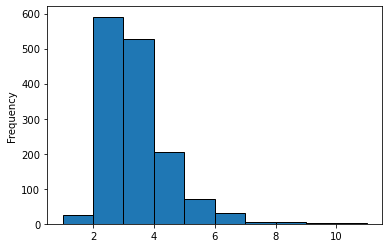

In [3]:
df['SalePrice_label'].plot(kind='hist', edgecolor='black')

In [4]:
nb_classes = 11
items_per_class = 300

In [5]:
df_labels = []
i = 0
for i in range(1,nb_classes+1):
    df_labels.append(df.loc[df['SalePrice_label'] == i])


#df_1 = df.loc[df['SalePrice_label'] == 1]
#df_2 = df.loc[df['SalePrice_label'] == 2]
#df_3 = df.loc[df['SalePrice_label'] == 3]
#df_4 = df.loc[df['SalePrice_label'] == 4]
#df_5 = df.loc[df['SalePrice_label'] == 5]
#df_6 = df.loc[df['SalePrice_label'] == 6]
#df_7 = df.loc[df['SalePrice_label'] == 7]
#df_8 = df.loc[df['SalePrice_label'] == 8]

#df_labels = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8]

In [6]:
#print(1, df_1.shape[0],'*', 2, df_2.shape[0],'*', 3, df_3.shape[0],'*', 4, df_4.shape[0],'*', 
#      5, df_5.shape[0],'*', 6, df_6.shape[0],'*', 7, df_7.shape[0],'*', 8, df_8.shape[0])

i = 0
for i in range(0,nb_classes):
    print(df_labels[i].shape)

(24, 82)
(591, 82)
(526, 82)
(204, 82)
(71, 82)
(30, 82)
(6, 82)
(4, 82)
(2, 82)
(1, 82)
(1, 82)


In [7]:
i = 0
for i in range(0,nb_classes):
    print(df_labels[i].shape)
    while True:
        if df_labels[i].shape[0] > items_per_class or df_labels[i].shape[0] == 0:
            break
        if(i%2 == 0):
            df_labels[i] = df_labels[i].append(df_labels[i].head(round(len(df)/10)), ignore_index=True)
        else:
            df_labels[i] = df_labels[i].append(df_labels[i].tail(round(len(df)/10)), ignore_index=True)
    print(df_labels[i].shape)

(24, 82)
(338, 82)
(591, 82)
(591, 82)
(526, 82)
(526, 82)
(204, 82)
(350, 82)
(71, 82)
(430, 82)
(30, 82)
(386, 82)
(6, 82)
(338, 82)
(4, 82)
(402, 82)
(2, 82)
(402, 82)
(1, 82)
(402, 82)
(1, 82)
(402, 82)


In [8]:
i = 0
for i in range(0, nb_classes):
    df_labels[i] = df_labels[i].head(items_per_class)

In [9]:
i = 0
for i in range(0, nb_classes):
    print(df_labels[i].shape)

(300, 82)
(300, 82)
(300, 82)
(300, 82)
(300, 82)
(300, 82)
(300, 82)
(300, 82)
(300, 82)
(300, 82)
(300, 82)


In [10]:
"""
df_balanced = df_labels[0].append(
    df_labels[1], ignore_index=True).append(
    df_labels[2], ignore_index=True).append(
    df_labels[3], ignore_index=True).append(
    df_labels[4], ignore_index=True).append(
    df_labels[5], ignore_index=True).append(
    df_labels[6], ignore_index=True).append(
    df_labels[7], ignore_index=True)
"""

df_balanced = df_labels[0]

for i in range(1, nb_classes):
    df_balanced = df_balanced.append(df_labels[i], ignore_index=True)

df_balanced.shape

(3300, 82)

<AxesSubplot:ylabel='Frequency'>

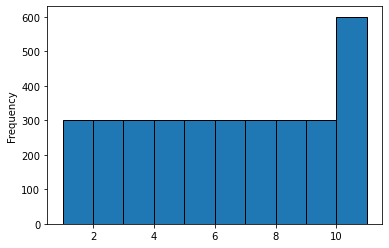

In [11]:
df_balanced['SalePrice_label'].plot(kind='hist', edgecolor='black')

In [12]:
df_balanced.to_csv('./dataset/train_label_balanced.csv', index=False)